In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('train.csv')

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df = df.drop(columns=['Id'])

y = df['SalePrice']
x = df.drop(columns=["SalePrice"])

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=17)

c:\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


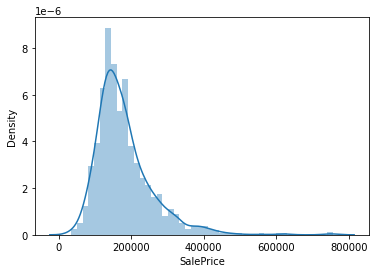

In [6]:
sns.distplot(y_train);

In [7]:
numeric_data = x_train.select_dtypes([np.number])
x_train.corr(method='pearson')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.375089,-0.116087,0.035537,-0.061191,0.046703,0.043404,0.030332,-0.086491,-0.057669,...,-0.082102,0.007061,0.003845,-0.015059,-0.056364,-0.034262,0.010073,-0.006440,-0.018200,-0.044608
LotFrontage,-0.375089,1.000000,0.434601,0.277890,-0.057095,0.119276,0.111126,0.201666,0.282577,0.043097,...,0.359100,0.093267,0.153072,0.001484,0.086484,0.048820,0.229755,-0.003657,0.035250,0.010262
LotArea,-0.116087,0.434601,1.000000,0.109709,-0.003305,0.003303,0.008711,0.113823,0.230834,0.132916,...,0.173350,0.164351,0.073851,-0.016373,0.020671,0.030681,0.081737,0.039804,-0.004915,-0.010623
OverallQual,0.035537,0.277890,0.109709,1.000000,-0.063020,0.544799,0.554711,0.388804,0.259547,-0.059897,...,0.547457,0.235904,0.304310,-0.111741,0.037318,0.067193,0.078085,-0.032117,0.092155,-0.040981
OverallCond,-0.061191,-0.057095,-0.003305,-0.063020,1.000000,-0.366923,0.078932,-0.115668,-0.049321,0.034038,...,-0.133334,0.016722,-0.019093,0.050684,0.011540,0.072999,-0.004237,0.078609,0.018633,0.032492
YearBuilt,0.046703,0.119276,0.003303,0.544799,-0.366923,1.000000,0.597974,0.314912,0.248667,-0.051483,...,0.443596,0.218074,0.173094,-0.391133,0.045946,-0.060316,0.007611,-0.037041,0.021272,-0.008131
YearRemodAdd,0.043404,0.111126,0.008711,0.554711,0.078932,0.597974,1.000000,0.181284,0.126241,-0.062516,...,0.366649,0.214392,0.225087,-0.197895,0.050881,-0.028602,0.007583,-0.008129,0.047746,0.027835
MasVnrArea,0.030332,0.201666,0.113823,0.388804,-0.115668,0.314912,0.181284,1.000000,0.303367,-0.089829,...,0.364707,0.157462,0.137721,-0.122479,0.023723,0.039890,0.014351,-0.034794,-0.000576,-0.023316
BsmtFinSF1,-0.086491,0.282577,0.230834,0.259547,-0.049321,0.248667,0.126241,0.303367,1.000000,-0.030693,...,0.331656,0.225531,0.110141,-0.097507,0.026212,0.040138,0.164509,0.006860,-0.002668,0.030713
BsmtFinSF2,-0.057669,0.043097,0.132916,-0.059897,0.034038,-0.051483,-0.062516,-0.089829,-0.030693,1.000000,...,-0.024993,0.040434,0.012085,0.034790,-0.030393,0.125081,0.054150,0.010882,-0.045220,0.019407


<AxesSubplot:>

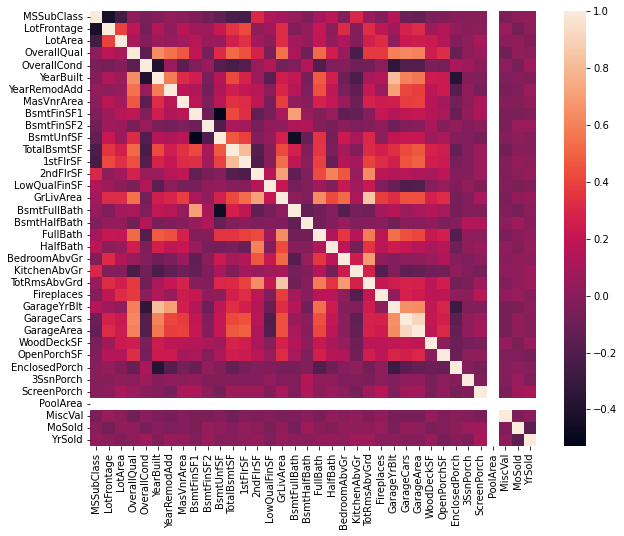

In [8]:
plt.subplots(figsize=(10,8))
sns.heatmap(x_valid.corr())

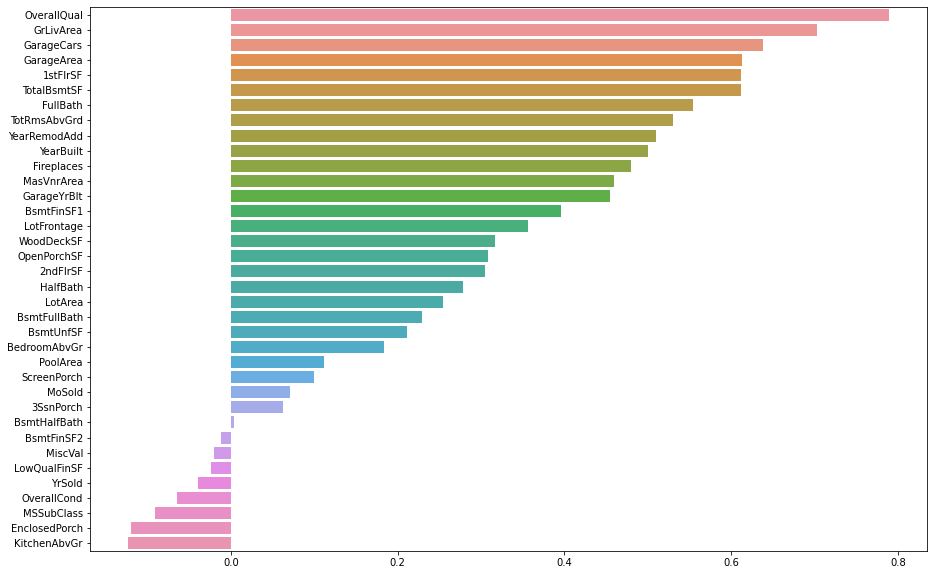

In [9]:
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

x_train = x_train.fillna(numeric_data_mean)
Y_valid = x_valid.fillna(numeric_data_mean)

correlations = x_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

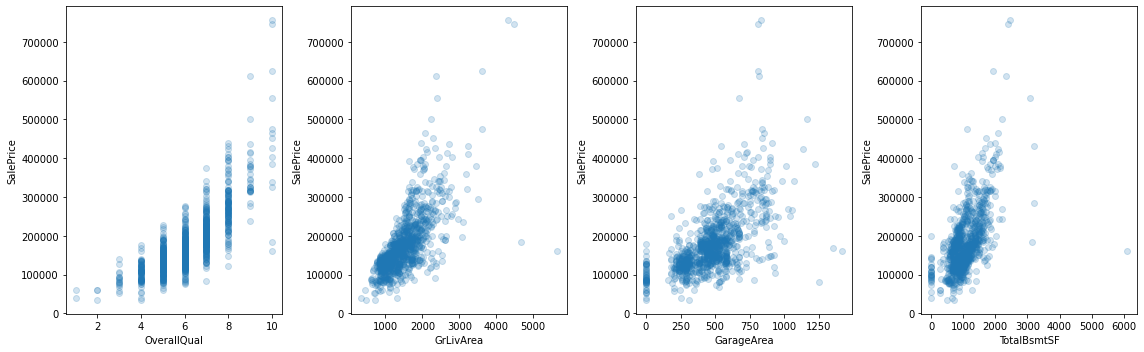

In [10]:
fig, axs = plt.subplots(figsize=(16,5), ncols=4)
for i, feature in enumerate(['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']):
    axs[i].scatter(x_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('SalePrice')
plt.tight_layout()

In [11]:
model = Ridge()
model.fit(x_train[numeric_features], y_train)
y_pred = model.predict(x_valid[numeric_features])
y_train_pred = model.predict(x_train[numeric_features])

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(f"Valid RMSE = {mean_squared_error(y_valid, y_pred, squared=False)}")
print(f"Train RMSE = {mean_squared_error(y_train, y_train_pred, squared=False)}")